In [58]:
#import libraries

from pandas_datareader import data, wb
import pandas as pd
import seaborn as sns
import numpy as np
import datetime 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline


In [50]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [51]:
#BankOfAmerica
BAC = data.DataReader('BAC','stooq',start,end)

#CitiGroup
CG = data.DataReader('CG','stooq',start,end)

#GoldmanSachs
GS = data.DataReader('GS','stooq',start,end)

#JP MorganChase
JPM = data.DataReader('JPM','stooq',start,end)

#MorganStanley 
MS = data.DataReader('MS','stooq',start,end)

#Wells Fargo

WF = data.DataReader('WF','stooq',start,end)


In [52]:
BAC

,Open,High,Low,Close,Volume
Date,,,,,
2015-12-31,14.7814,14.8325,14.6233,14.6233,5.417059e+07
2015-12-30,14.9473,14.9807,14.8070,14.8168,4.030734e+07
2015-12-29,14.9897,15.0780,14.9130,15.0131,5.251059e+07
2015-12-28,14.9630,14.9720,14.7539,14.8846,4.803435e+07
2015-12-24,15.0495,15.1035,14.9630,15.0063,3.380344e+07
...,...,...,...,...,...
2006-01-09,39.3182,39.5294,39.0158,39.2181,1.855918e+07
2006-01-06,39.3850,39.4774,39.0089,39.1917,1.496529e+07
2006-01-05,39.2004,39.4126,38.9834,39.2525,1.761312e+07


In [53]:
tickers = ['BAC','CG','GS','JPM','MS','WF']

bank_stocks = pd.concat([BAC,CG,GS,JPM,MS,WF],axis=1,keys=tickers)

In [54]:
bank_stocks.head()

BAC                                           \
                        Open     High      Low    Close        Volume   
2015-12-31 00:00:00  14.7814  14.8325  14.6233  14.6233  5.417059e+07   
2015-12-30 00:00:00  14.9473  14.9807  14.8070  14.8168  4.030734e+07   
2015-12-29 00:00:00  14.9897  15.0780  14.9130  15.0131  5.251059e+07   
2015-12-28 00:00:00  14.9630  14.9720  14.7539  14.8846  4.803435e+07   
2015-12-24 00:00:00  15.0495  15.1035  14.9630  15.0063  3.380344e+07   

                          CG                                           ...  \
                        Open     High      Low    Close        Volume  ...   
2015-12-31 00:00:00  10.6131  10.8288  10.6131  10.7416  9.202794e+05  ...   
2015-12-30 00:00:00  10.3406  10.8838  10.3268  10.7258  1.077859e+06  ...   
2015-12-29 00:00:00  10.8984  10.9327  10.8004  10.8347  1.068275e+06  ...   
2015-12-28 00:00:00  10.9259  11.0219  10.7258  10.8984  1.169801e+06  ...   
2015-12-24 00:00:00  11.0063  11.1573  10.9259  11.0406  3.799552e+05  ...   

                         JPM                                           \
                        Open     High      Low    Close        Volume   
2015-12-31 00:00:00  54.3802  54.8616  54.2220  54.2504  1.783536e+07   
2015-12-30 00:00:00  55.0767  55.0836  54.5904  54.7072  8.751596e+06   
2015-12-29 00:00:00  54.9126  55.2889  54.8301  55.0983  1.195386e+07   
2015-12-28 00:00:00  54.4588  54.5904  53.9842  54.5364  8.046338e+06   
2015-12-24 00:00:00  54.7338  54.9529  54.4862  54.7162  5.438811e+06   

                          MS                                           
                        Open     High      Low    Close        Volume  
2015-12-31 00:00:00  26.6023  26.9300  26.4865  26.5229  9.773893e+06  
2015-12-30 00:00:00  27.0998  27.2194  26.8476  26.8721  6.065510e+06  
2015-12-29 00:00:00  27.0448  27.2656  26.9506  27.1380  7.661993e+06  
2015-12-28 00:00:00  26.9820  26.9820  26.6377  26.8211  6.501028e+06  
2015-12-24 00:00:00  27.1547  27.2734  27.0448  27.0811  3.356089e+06  

[5 rows x 25 columns]

In [55]:
for tick in tickers:
    print(tick,bank_stocks['BAC']['Close'].max())

BAC 46.2013
CG 46.2013
GS 46.2013
JPM 46.2013
MS 46.2013
WF 46.2013


In [59]:
returns = pd.DataFrame()
for tick in tickers[:-1]:
    returns[tick+' Return'] = bank_stocks[tick]['Close']
returns.head()

,BAC Return,CG Return,GS Return,JPM Return,MS Return
2015-12-31 00:00:00,14.6233,10.7416,158.373,54.2504,26.5229
2015-12-30 00:00:00,14.8168,10.7258,159.923,54.7072,26.8721
2015-12-29 00:00:00,15.0131,10.8347,161.264,55.0983,27.1380
2015-12-28 00:00:00,14.8846,10.8984,159.599,54.5364,26.8211
2015-12-24 00:00:00,15.0063,11.0406,160.353,54.7162,27.0811


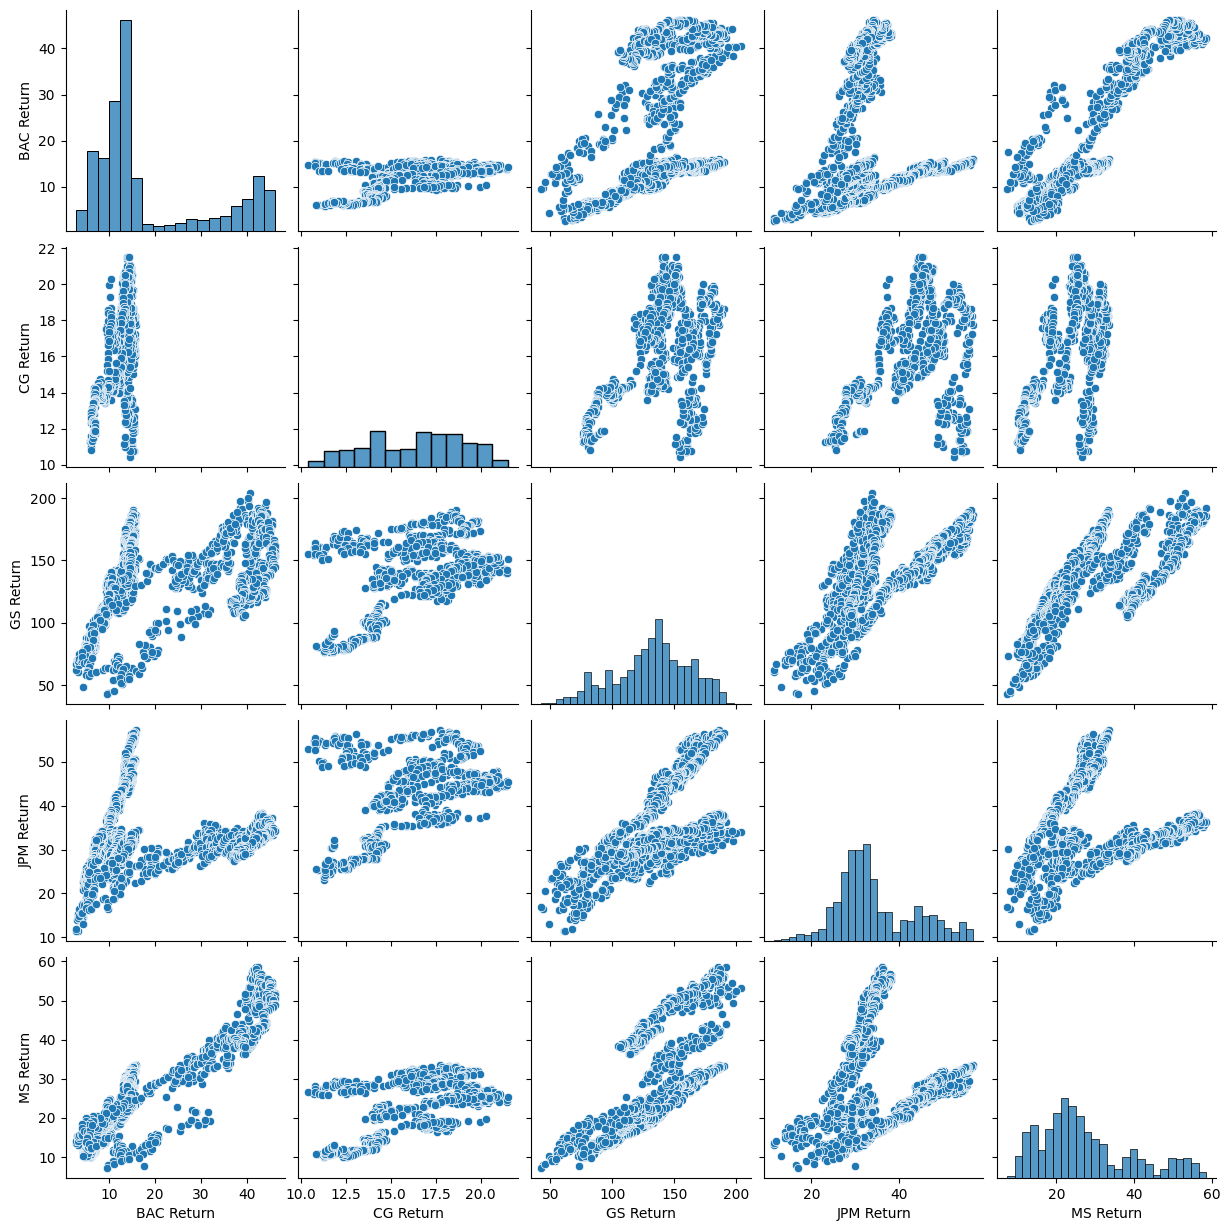

In [60]:
sns.pairplot(returns)

In [62]:
returns.idxmax()

BAC Return   2006-11-20
CG Return    2014-01-14
GS Return    2007-10-31
JPM Return   2015-07-22
MS Return    2007-06-14
dtype: datetime64[ns]

In [64]:
returns.idxmin()

BAC Return   2009-03-06
CG Return    2015-12-14
GS Return    2008-11-20
JPM Return   2009-03-09
MS Return    2008-11-20
dtype: datetime64[ns]

In [65]:
returns.std()

BAC Return    12.847847
CG Return      2.720207
GS Return     30.463127
JPM Return     8.853668
MS Return     12.036978
dtype: float64

In [84]:
returns

,BAC Return,CG Return,GS Return,JPM Return,MS Return
2015-12-31,14.6233,10.7416,158.373,54.2504,26.5229
2015-12-30,14.8168,10.7258,159.923,54.7072,26.8721
2015-12-29,15.0131,10.8347,161.264,55.0983,27.1380
2015-12-28,14.8846,10.8984,159.599,54.5364,26.8211
2015-12-24,15.0063,11.0406,160.353,54.7162,27.0811
...,...,...,...,...,...
2006-01-09,39.2181,NaN,107.128,29.3229,38.8120
2006-01-06,39.1917,NaN,105.855,28.8543,38.4108
2006-01-05,39.2525,NaN,104.394,28.6520,38.3715
2006-01-04,39.2004,NaN,104.432,28.5626,38.2675
